## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 16
---------------------------------------

GOALS:

1. Work to understand when a linear model vs. non-linear model is a good choice.
2. Practice plotting residuals and regression lines.
3. Do an analysis using non-linear regression.


----------------------------------------------------------

This homework has **2 Questions** and **3 Exercises**

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


## Announcements

**Come to Lab!** If you need help we are here to help!



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Paris Paintings Data - Load the data

To explore the ideas of modeling data we will use the Paris Paintings dataset.

- Source: Printed catalogs of 28 auction sales in Paris, 1764 - 1780 (Historical Data)
- Data curators Sandra van Ginhoven and Hilary Coe Cronheim (who were PhD students in the Duke Art, Law, and Markets Initiative at the time of putting together this dataset) translated and tabulated the catalogs
-  3393 paintings, their prices, and descriptive details from sales catalogs over 60 variables

[Variables in Paris Paintings Data](https://www2.stat.duke.edu/~cr173/Sta112_Fa16/data/paris_paintings.html)

This lab follows the Data Science in a Box units "Unit 4 - Deck 3: Modeling nonlinear relationships " by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [2]:
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [3]:
show(DF_raw_paintings)

Loading ITables v2.5.2 from the internet... (need help?)


In [4]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

## Explore Linearity

Fit a model for Price as a function of size. Let's redo that analysis except this time focus only on paintings with area of less than 10,000 inches squared.

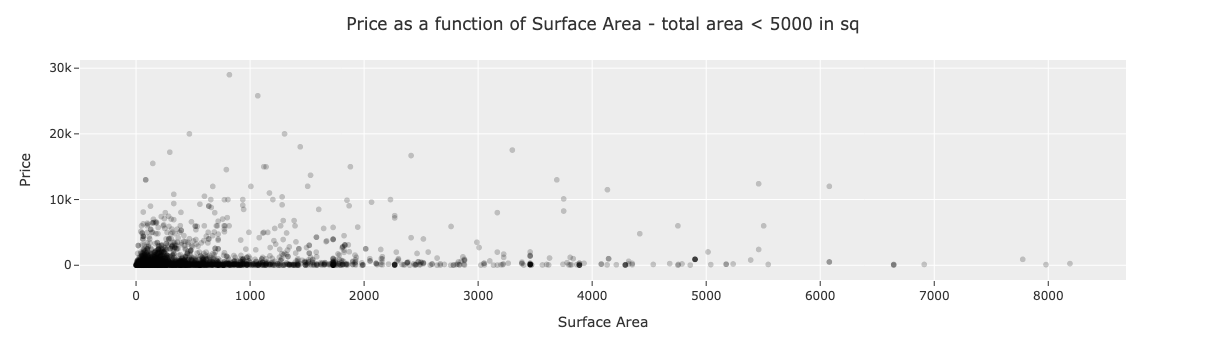

Model Score:
0.014875957473786783


In [5]:
#| code-fold: true
#| code-summary: "Answer to Exercise 2 Day 15 for paintings < 10000 in^2"

# Get the columns I care about
my_columns = ['Surface','price']
DF_model2 = DF[my_columns]

# Do some preprocessing - drop NA and make the Surface variable a float
DF_model2.dropna(inplace=True)
DF_model2['Surface'] = DF_model2['Surface'].apply(lambda x: float(x))

# Mask the data for surface area less than 10,000
mask = DF_model2['Surface'] <= 10_000
DF_model2 = DF_model2[mask]

# Make a Scatter plot
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='Price')


fig.show()

# Create the X and y variables for Linear Regression
X = DF_model2['Surface'].values.reshape(-1,1)
y = DF_model2['price'].values

# Create linear regression object - a random straight line
LM = LinearRegression()
# Train the model using the data
LM.fit(X, y)

# The score from my model
print('Model Score:')
print(LM.score(X,y))

**Exercise 1** Create a Residual plot for the model above.

1. Get the predictions - store these in a column in the data frame

```{python}
LM.predict(X)
```

2. Calculate the residuals - store these in a column in the data frame
```{python}
'Residual' = 'Real Value in the Data' - 'Value Predicted by LM'
```

3. Plot the result
```{python}
px.scatter(df,x='Value Predicted by LM',y='Residual')
```


See if you can recreate the plot shown in the lecture.

In [17]:
DF_model2['Predicted_Price'] = LM.predict(X)
DF_model2['Residual'] = DF_model2['price'] - DF_model2['Surface']
show(DF_model2)

Loading ITables v2.5.2 from the internet... (need help?)


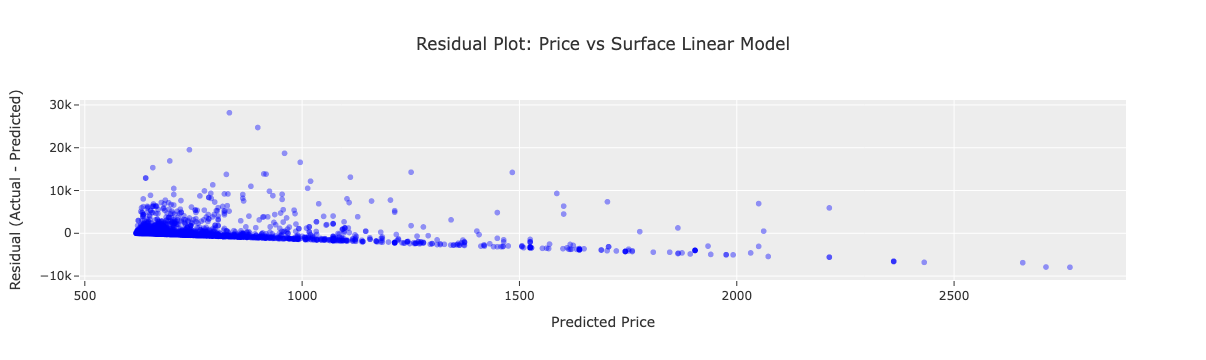

In [20]:
fig = px.scatter(
    DF_model2,
    x='Predicted_Price',
    y='Residual',
    opacity=0.4,
    color_discrete_sequence=['blue'],
    title='Residual Plot: Price vs Surface Linear Model')

fig.update_layout(
    template='ggplot2',
    xaxis_title='Predicted Price',
    yaxis_title='Residual (Actual - Predicted)')

fig.show()

**Q1** What do you see here? Does this residual data seem uniformly distributed?


We are seeing that the residuals are getting below 0 so I am not getting the pattern in the data

## From Lecture - Consider the skew in the data

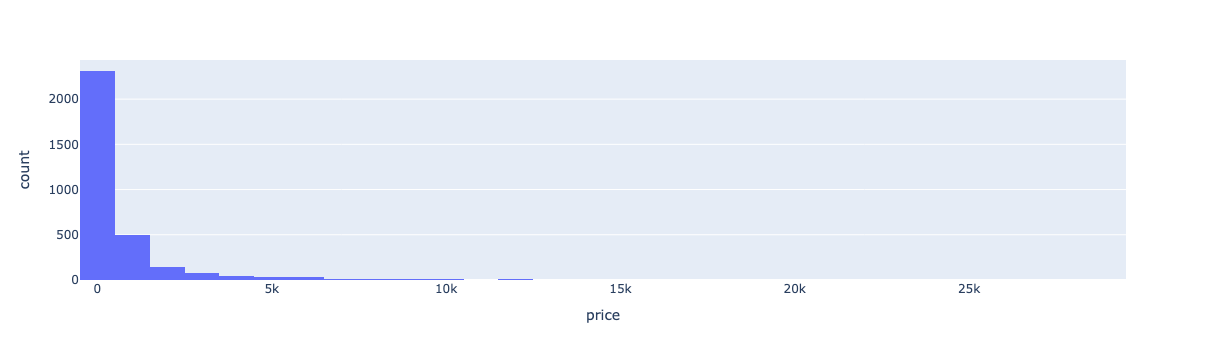

In [21]:
# Plot a histogram - notice that it is very skewed
fig = px.histogram(DF_model2,x='price',nbins =30)
fig.show()

In [22]:
# Us numpy to take the natural log of the data - removing the exponential decay
DF_model2['log_price'] = np.log(DF_model2['price'])

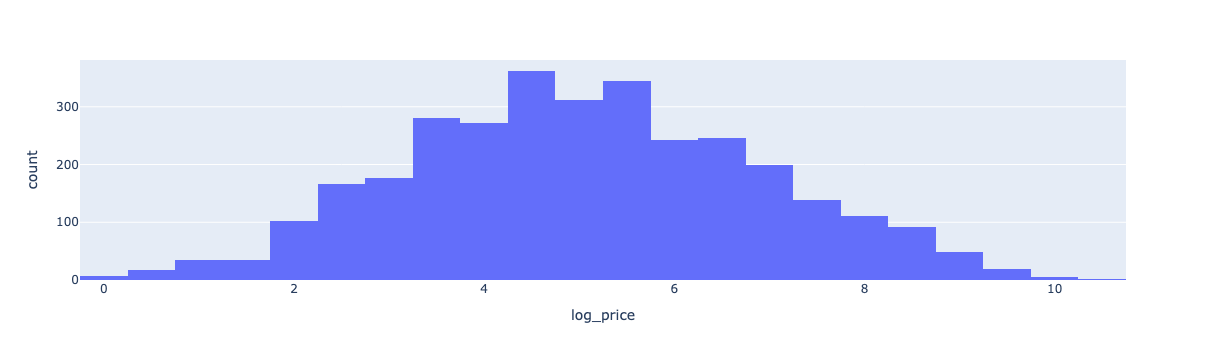

In [23]:
# Plot a histogram of the log(price) - notice we have removed the skew
fig = px.histogram(DF_model2,x='log_price',nbins =30)

fig.show()

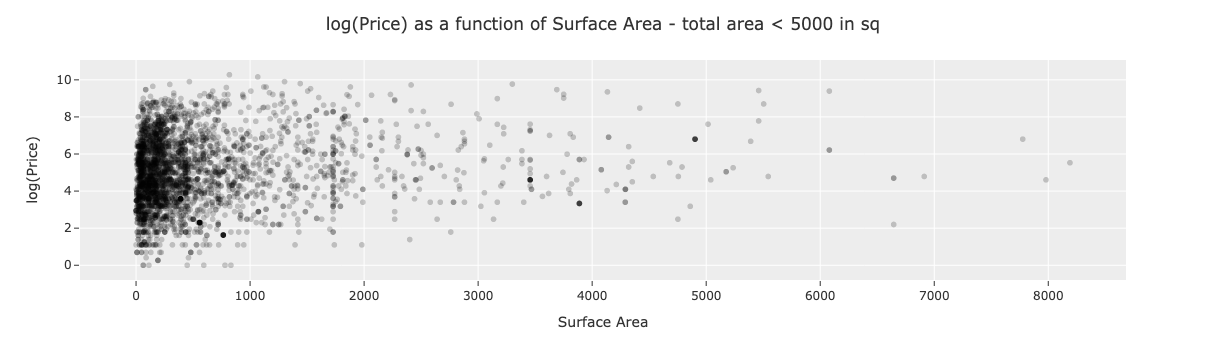

In [24]:
# Look at the scatter plot of the log(price)
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='log(Price)')


fig.show()

**Q2** What is different about the histogram and the scatter plots after taking the natural log?

We see it a condense of the log price on the scatter with no linear relationship

**Exercise 2:** Redo the linear regression analysis except this time use the log_price.

- Find the linear regression model (LM)
- Calculate the residual
- Plot the Residual as a function of the predicted log price
- Plot a scatter plot of the data with the linear regression line added.

*HINT* You can see my results in the lecture notes!

In [34]:
DF_model2['log_price'] = np.log(DF_model2['price'])

LM = LinearRegression()
LM.fit(X, y)

DF_model2['log_price'] = LM.predict(X)

DF_model2['Residual'] = DF_model2['log_price'] - DF_model2['Surface']

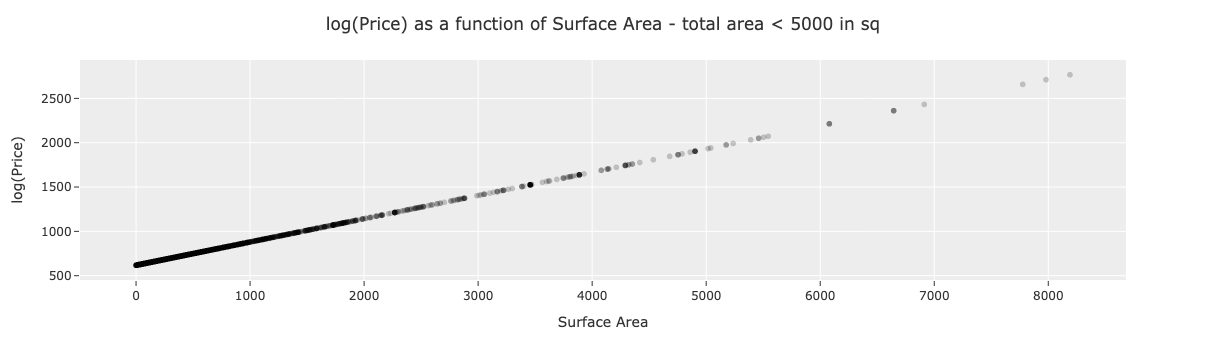

In [35]:
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='log(Price)')


fig.show()

### What did we learn...

What is the model telling me?

$$ \hat{\log(price)} = 4.912 + 0.00024(Surface Area)$$

so we can calculate (see the lecture for details!)

$$ (SA+1) \sim 1.0002400288023041 * SA$$

This tells us that increase the area of the painting by one square inch increases the price by a factor of 1.0002400288023041 or about 0.024%.

There is a small positive increase in the price as the surface area increases, on average. 

Can we predict the price using the surface area? Look at LM.score(X,y)...

It does not appear that our logistic regression is a good predictor of the price. Even though it looks like we captured a good linear relationship, we do not have a good predictor. The scatter is still very large!

BUT - we are still able to see a linear trend in the model. There is a relationship here even though the data is very noisy!

**Exercise 3** Redo the full analysis except this time try using just height to predict price.

- Do a standard linear regression of the height vs. the price (without log) discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price.....
- Do a linear regression of the height vs. log_price and discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price..... Remember in this case you have to use the rules of logs and exponents to interpret the results.

Which of these models do you think is doing a better job of capturing the functional relationships in the price vs height data? Why?

In [47]:
model = DF[['price','Height_in']]
model = model.dropna(subset=['Height_in', 'price'])

model['Height_in'] = model['Height_in'].astype(float)

model['log_price'] = np.log(model['price'])
show(model)

Loading ITables v2.5.2 from the internet... (need help?)


In [48]:
X = model['Height_in'].values.reshape(-1,1)
y = model['price'].values

LM = LinearRegression()

LM.fit(X,y)

model['pred_price'] = LM.predict(X)
model['Residual_price'] = y - model['pred_price']

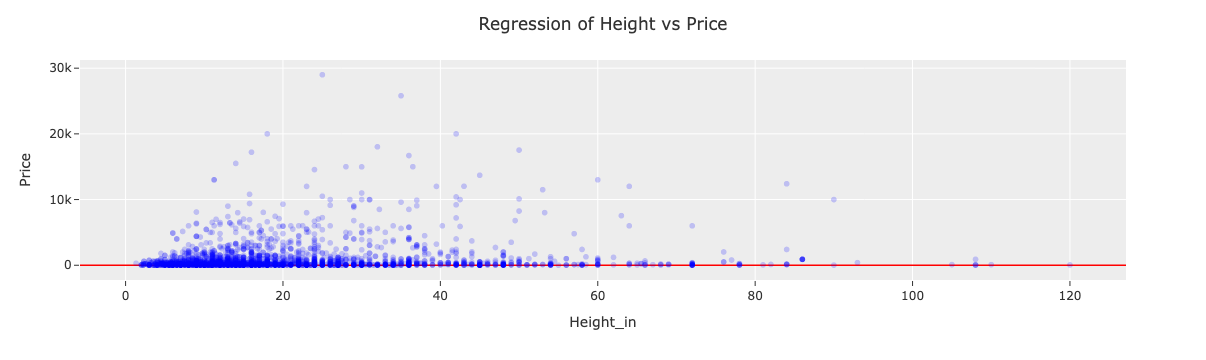

In [55]:
fig = px.scatter(
    model,
    x='Height_in',
    y='price',
    color_discrete_sequence=['blue'],
    opacity=0.2
)

fig.update_layout(yaxis = dict(zeroline=True, zerolinewidth=1.5,zerolinecolor='red'))

fig.update_layout(template="ggplot2",
                  title='Regression of Height vs Price',
                  title_x=0.5,
                  xaxis_title='Height_in',
                  yaxis_title='Price')


fig.show()

In [56]:
X = model['Height_in'].values.reshape(-1,1)
y = model['log_price'].values

LM = LinearRegression()

LM.fit(X,y)

model['pred_price'] = LM.predict(X)
model['Residual_price'] = y - model['pred_price']

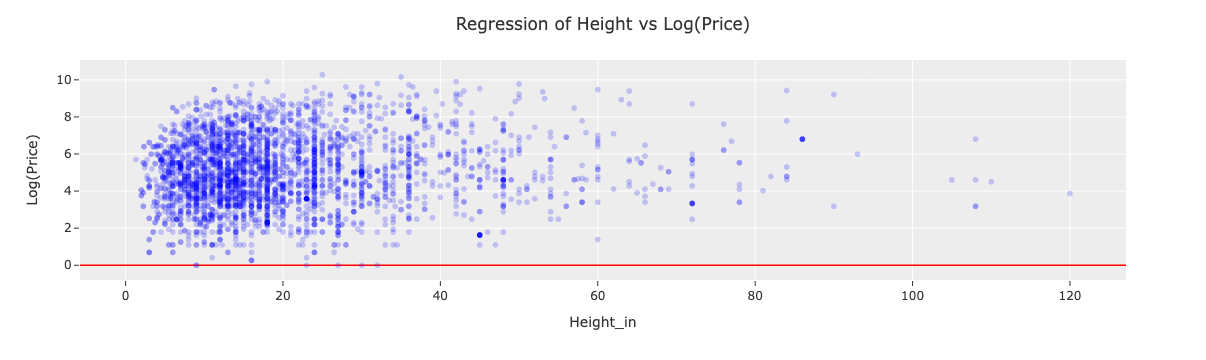

In [59]:
fig = px.scatter(
    model,
    x='Height_in',
    y='log_price',
    color_discrete_sequence=['blue'],
    opacity=0.2
)

fig.update_layout(yaxis = dict(zeroline=True, zerolinewidth=1.5,zerolinecolor='red'))

fig.update_layout(template="ggplot2",
                  title='Regression of Height vs Log(Price)',
                  title_x=0.5,
                  xaxis_title='Height_in',
                  yaxis_title='Log(Price)')


fig.show()

We see that the scatter plot raises up in the y-axis when log_price is used 

I think it is better to use the log(price) because we get to really visualize instead of all the points mixed together on the x-axis line